In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
#Creating toy data for test
np.random.seed(0)
X_text = np.random.rand(10, 10).astype(np.float32)
X_num = np.random.rand(10, 1).astype(np.float32)
y = np.random.randint(0, 2, size=(10, 1)).astype(np.float32)

In [4]:
#Convert to PyTorch tensors
X_text = torch.from_numpy(X_text)
X_num = torch.from_numpy(X_num)
y = torch.from_numpy(y)

In [5]:
#Define model
class MultimodalNet(nn.Module):
    def __init__(self):
        super(MultimodalNet, self).__init__()
        self.text_branch = nn.Sequential(
            nn.Linear(10, 8),
            nn.ReLU()
        )
        self.num_branch = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU()
        )
        self.combined = nn.Sequential(
            nn.Linear(8 + 4, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x_text, x_num):
        text_out = self.text_branch(x_text)
        num_out = self.num_branch(x_num)
        x = torch.cat((text_out, num_out), dim=1)
        return self.combined(x)


In [6]:
#Instantiate model, loss function, optimizer
model = MultimodalNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [7]:
#Training
for epoch in range(30):
    optimizer.zero_grad()
    outputs = model(X_text, X_num)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/30], Loss: {loss.item():.4f}")

Epoch [10/30], Loss: 0.6763
Epoch [20/30], Loss: 0.6073
Epoch [30/30], Loss: 0.4661


In [8]:
#Evaluation
with torch.no_grad():
    preds = (model(X_text, X_num) > 0.5).float()
    accuracy = (preds == y).float().mean()
    print(f"Accuracy: {accuracy.item():.2f}")

Accuracy: 0.90


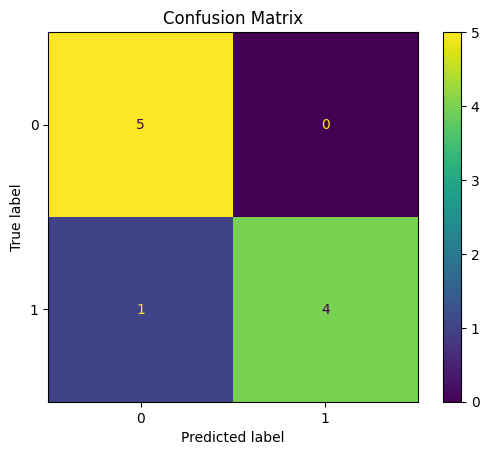

In [9]:
#Visualise the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()